<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Data-Explore" data-toc-modified-id="Data-Explore-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Explore</a></span><ul class="toc-item"><li><span><a href="#Basic-Statistics" data-toc-modified-id="Basic-Statistics-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Basic Statistics</a></span></li><li><span><a href="#Outliers" data-toc-modified-id="Outliers-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Outliers</a></span></li><li><span><a href="#Correlation-Amoung-Features" data-toc-modified-id="Correlation-Amoung-Features-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Correlation Amoung Features</a></span></li><li><span><a href="#Features'-Distribution-and-Relationship-with-Y" data-toc-modified-id="Features'-Distribution-and-Relationship-with-Y-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Features' Distribution and Relationship with Y</a></span></li></ul></li><li><span><a href="#Model" data-toc-modified-id="Model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Model</a></span><ul class="toc-item"><li><span><a href="#Model-Specification-1" data-toc-modified-id="Model-Specification-1-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Model Specification 1</a></span></li><li><span><a href="#Model-Specification-2" data-toc-modified-id="Model-Specification-2-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Model Specification 2</a></span></li><li><span><a href="#Model-Specification-3" data-toc-modified-id="Model-Specification-3-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Model Specification 3</a></span></li><li><span><a href="#Model-Specification-4" data-toc-modified-id="Model-Specification-4-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Model Specification 4</a></span></li></ul></li><li><span><a href="#Findings-and-Evaluation" data-toc-modified-id="Findings-and-Evaluation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Findings and Evaluation</a></span><ul class="toc-item"><li><span><a href="#True-Price-vs-Predicted-Price" data-toc-modified-id="True-Price-vs-Predicted-Price-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>True Price vs Predicted Price</a></span></li><li><span><a href="#True-Price-vs-Prediction-Error" data-toc-modified-id="True-Price-vs-Prediction-Error-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>True Price vs Prediction Error</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# Introduction

+ House price is relavent to eveyone of us, if we need buy realestate, we don't want to pay too high; when we sell one, we don't want to sell too low. There might be hundreds of factors that can affect house price, In this project, I make several house price predict regression models, find out a relavently good model that can predict this interesting price.

+ Based on my model,  house_age, distance_to_MRT_station, number_of_convenience_stores, latitude and transaction_year are significant factors relavent to house price.

+ [Yeh, I. C., & Hsu, T. K. (2018)](https://www.sciencedirect.com/science/article/abs/pii/S1568494618300358) proposed an innovative real estate valuation approach called Quantitative Comparative Approach, which can estimate correction coefficients to overcome the shortcomings of subjective decisions of correction coefficients of traditional comparative approach


In [1]:
import numpy as np
import statsmodels.api as sm
import pandas as pd
from pandas.tseries.offsets import DateOffset

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")
sns.set_palette("Set2")

In [2]:
df=pd.read_excel("Real estate valuation data set.xlsx")
df.set_index("No",inplace=True)
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
def clean_date(x):
    year,decimal=divmod(x,1)
    
    days=int(decimal*365)
    dt=pd.to_datetime("{}-01-01".format(int(year)))
    
    dt=dt+DateOffset(days=days)
    return dt

df["X1 transaction date"]=df["X1 transaction date"].apply(clean_date)

df.columns=['transaction_date','house_age', 'distance_to_MRT_station', 'number_of_convenience_stores', 'latitude', 'longitude', 'house_price_of_unit_area']
df.head()

,transaction_date,house_age,distance_to_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area
No,,,,,,,
1,2012-11-30,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012-11-30,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013-08-01,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013-07-02,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012-10-31,5.0,390.56840,5,24.97937,121.54245,43.1


# Data Explore

+ data source: https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set, The market historical data set of real estate valuation are collected from Sindian Dist., New Taipei City, Taiwan.

+ Attribute Information:
    - X1=the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
    - X2=the house age (unit: year)
    - X3=the distance to the nearest MRT station (unit: meter)
    - X4=the number of convenience stores in the living circle on foot (integer)
    - X5=the geographic coordinate, latitude. (unit: degree)
    - X6=the geographic coordinate, longitude. (unit: degree)
    - Y= house price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared)
    
+ data transformation: I use log-transformation to deal with distance_to_MRT_station, which help reduce the outlier values
+ outliers remove: there exists a few outliers in house_price_of_unit_area, I use 1.5IQR rule to target those outliers, and deleted them(3 sample in all)

## Basic Statistics

+ this data has 414 records, covers house transaction from 2018-01-31 to 2013-08-31, no missing data exists.
+ the price ranges from 7.6 per unit area to 117.5 per unit area, which is quite a big range.

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
house_age,414.0,17.712560,11.392485,0.00000,9.025000,16.10000,28.150000,43.80000
distance_to_MRT_station,414.0,1083.885689,1262.109595,23.38284,289.324800,492.23130,1454.279000,6488.02100
number_of_convenience_stores,414.0,4.094203,2.945562,0.00000,1.000000,4.00000,6.000000,10.00000
latitude,414.0,24.969030,0.012410,24.93207,24.963000,24.97110,24.977455,25.01459
longitude,414.0,121.533361,0.015347,121.47353,121.528085,121.53863,121.543305,121.56627
house_price_of_unit_area,414.0,37.980193,13.606488,7.60000,27.700000,38.45000,46.600000,117.50000


In [5]:
df["transaction_date"].min(), df["transaction_date"].max()

(Timestamp('2012-08-31 00:00:00'), Timestamp('2013-08-01 00:00:00'))

## Outliers 

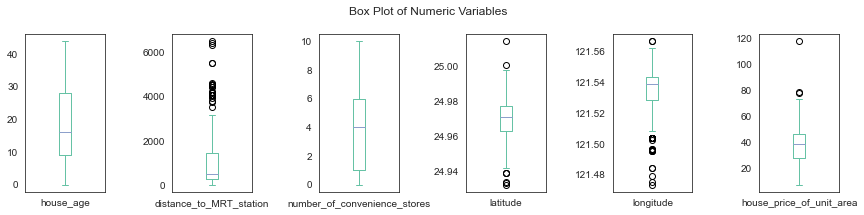

In [6]:
_=df[['house_age', 'distance_to_MRT_station', 'number_of_convenience_stores', 'latitude', 'longitude', 'house_price_of_unit_area']].plot(
                                                                                                            kind="box",
                                                                                                            grid=False,
                                                                                                            figsize=(12,3),
                                                                                                            subplots=True,
                                                                                                            layout=(1,6),
                                                                                                            fontsize=10,
                                                                                                            title="Box Plot of Numeric Variables")

plt.tight_layout()

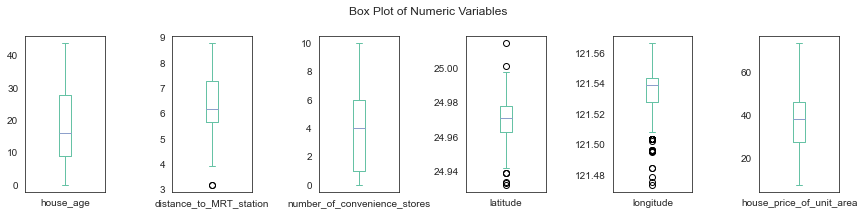

In [7]:
# log transformation and outliers remove

df['distance_to_MRT_station']=np.log1p(df['distance_to_MRT_station'])


price_q1, price_q3=df['house_price_of_unit_area'].quantile(0.25),df['house_price_of_unit_area'].quantile(0.75)
iqr=price_q3-price_q1
df=df[(df["house_price_of_unit_area"]>=(price_q1-1.5*iqr))&(df["house_price_of_unit_area"]<=(price_q3+1.5*iqr))].copy()

_=df[['house_age', 'distance_to_MRT_station', 'number_of_convenience_stores', 'latitude', 'longitude', 'house_price_of_unit_area']].plot(
                                                                                                            kind="box",
                                                                                                            grid=False,
                                                                                                            figsize=(12,3),
                                                                                                            subplots=True,
                                                                                                            layout=(1,6),
                                                                                                            fontsize=10,
                                                                                                            title="Box Plot of Numeric Variables")

plt.tight_layout()

## Correlation Amoung Features

+ 1. we find small correlation in these variables:
    - (number_of_convenience_stores, latitude)
    - (number_of_convenience_stores, longitude)
    - (distance_to_MRT_station, latitude)
+ 2. moderate correlation in these variables:
    - (distance_to_MRT_station, number_of_convenience_stores)
    - (distance_to_MRT_station, longitude)

Text(0.5, 1.0, 'Correlation Amoung Features')

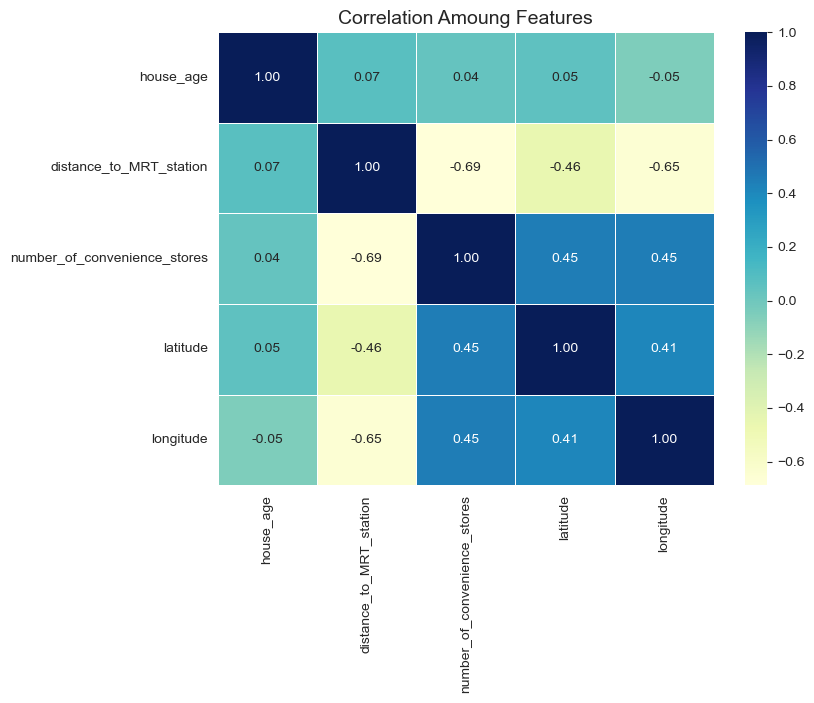

In [8]:
df_corr=df[['house_age', 'distance_to_MRT_station', 'number_of_convenience_stores', 'latitude', 'longitude']].corr()

plt.figure(figsize=(8,6),dpi=100)
sns.heatmap(df_corr, cmap="YlGnBu",linewidths=.5,annot=True, fmt="0.2f")
plt.title("Correlation Amoung Features",fontsize=14)

## Features' Distribution and Relationship with Y

1. we find a none linear relationship between house_age and price, there is a negative relationship when age<25, and positive relationship when age above 25
2. strong negative repationship between distance_to_MRT_station and price.
3. strong positive relationship between number_of_convenience_stores and price.
4. not very strong relationship between latitude, longitude and price.

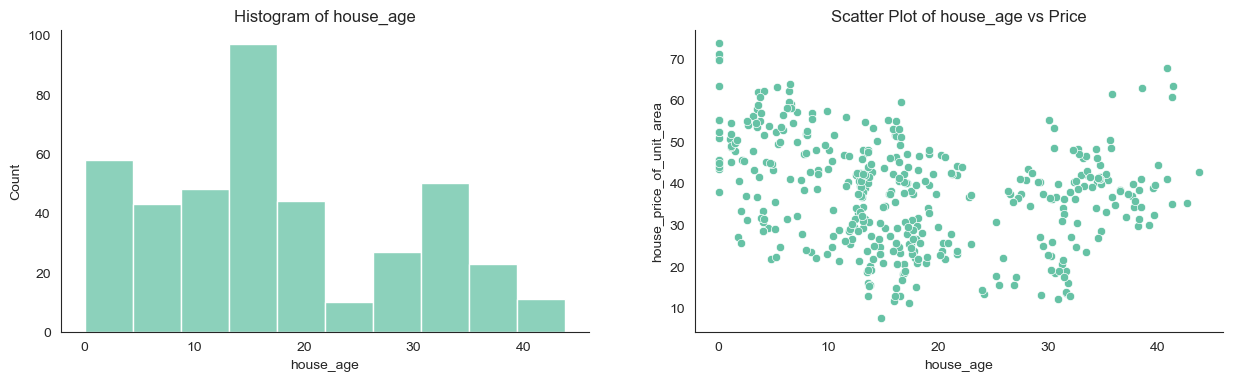

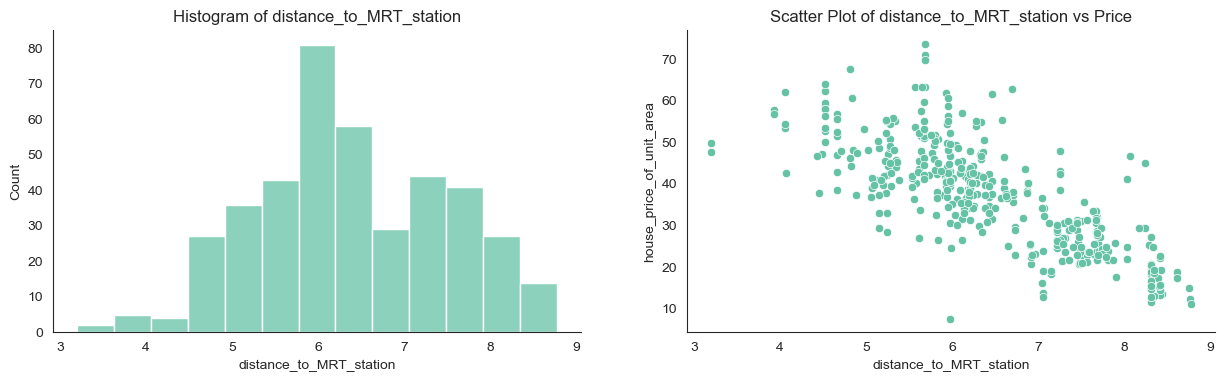

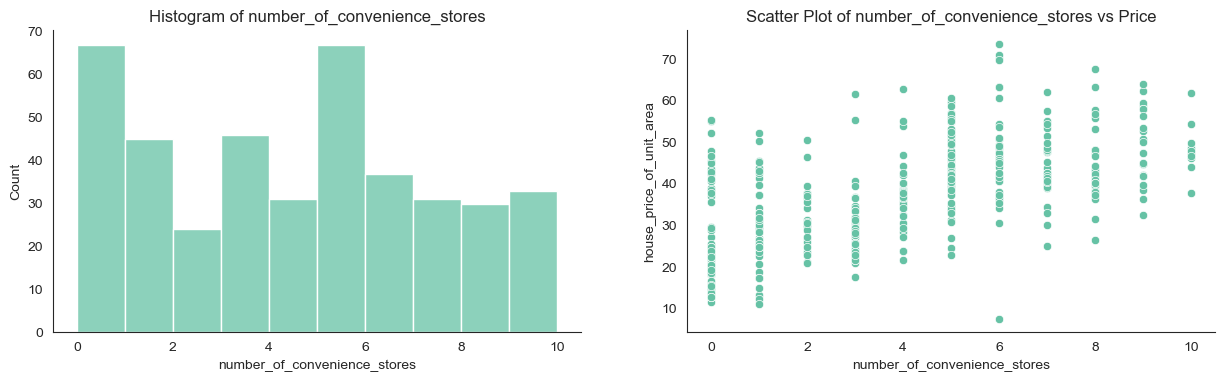

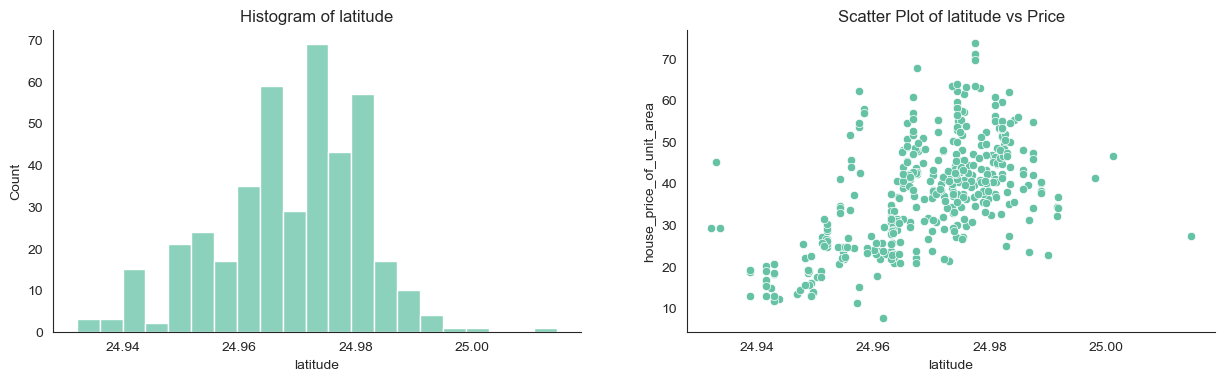

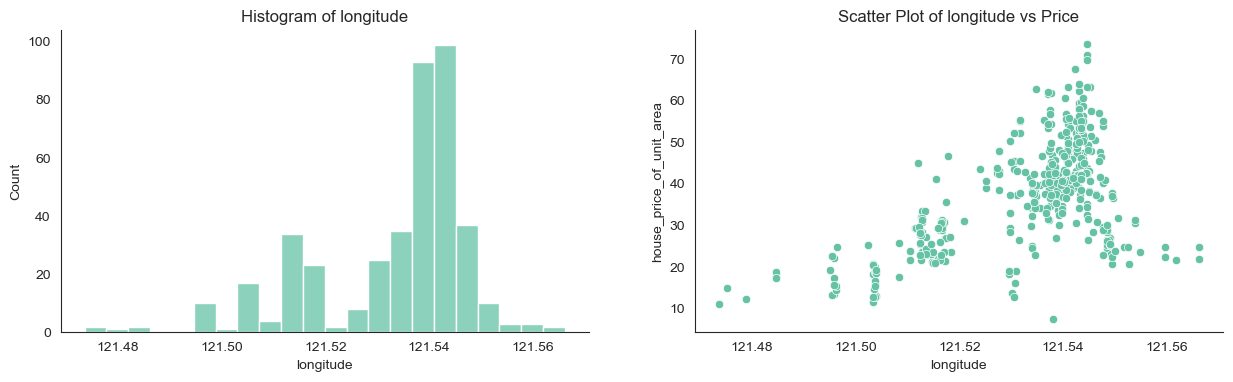

In [9]:
for col in ['house_age', 'distance_to_MRT_station', 'number_of_convenience_stores', 'latitude', 'longitude']:
    fig,axs=plt.subplots(1,2,figsize=(15,4),dpi=100)
    
    sns.histplot(x=col,data=df,ax=axs[0])
    axs[0].set_title("Histogram of {}".format(col),fontsize=12)
    sns.despine()
    
    sns.scatterplot(x=col,y='house_price_of_unit_area',data=df,ax=axs[1])
    axs[1].set_title("Scatter Plot of {} vs Price".format(col),fontsize=12)
    sns.despine()
    
    plt.show()

# Model

## Model Specification 1

+ OLS with raw features
+ this regression model gets a adjusted $R^{2}=0.695$, model explained 70% price variation.
+ except longitude,  all other features p value is below 0.05
+ there might be multicollinearity as we found ealier that some correlation exists among features.

In [10]:
X=df[['house_age', 'distance_to_MRT_station', 'number_of_convenience_stores', 'latitude', 'longitude']]
y=df['house_price_of_unit_area']

model1=sm.OLS(y, sm.add_constant(X))
res1=model1.fit()

print(res1.summary())

                               OLS Regression Results                               
Dep. Variable:     house_price_of_unit_area   R-squared:                       0.699
Model:                                  OLS   Adj. R-squared:                  0.695
Method:                       Least Squares   F-statistic:                     188.2
Date:                      Tue, 26 Apr 2022   Prob (F-statistic):          3.07e-103
Time:                              23:02:16   Log-Likelihood:                -1382.7
No. Observations:                       411   AIC:                             2777.
Df Residuals:                           405   BIC:                             2802.
Df Model:                                 5                                         
Covariance Type:                  nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

## Model Specification 2

+ as we know there exists correlation between 'distance_to_MRT_station', 'number_of_convenience_stores', 'latitude', 'longitude'
+ they all describe features about geographical position, we try to use pca to shrink the dimension here.
+ pca1 for 'distance_to_MRT_station', 'number_of_convenience_stores', the explained variance of the first component is 0.94, which means pca is usefull here.
+ pca2 for 'latitude', 'longitude', the explained variance of the first component is 0.72, is also acceptable here.
+ this regression model gets a adjusted $R^{2}=0.593$, get worse than the previous one.

In [11]:
# pca1 for 'distance_to_MRT_station', 'number_of_convenience_stores'

pca = PCA()
pca.fit(df[['distance_to_MRT_station', 'number_of_convenience_stores']])

exp_var = pca.explained_variance_ratio_
df_trn = pd.DataFrame(enumerate(exp_var))
df_trn.columns = ['N', 'explained variance ratio']
df_trn['cumulative explained variance ratio'] = np.cumsum(df_trn['explained variance ratio'])

df_trn["N"]=df_trn["N"]+1
display(df_trn)


# df_trn[["N",'explained variance ratio']].set_index("N").plot(marker="o",figsize=(8,5))
# sns.despine()

,N,explained variance ratio,cumulative explained variance ratio
0,1,0.937847,0.937847
1,2,0.062153,1.000000


In [12]:
# pca2 for 'latitude', 'longitude'

pca = PCA()
pca.fit(df[[ 'latitude', 'longitude']])

exp_var = pca.explained_variance_ratio_
df_trn = pd.DataFrame(enumerate(exp_var))
df_trn.columns = ['N', 'explained variance ratio']
df_trn['cumulative explained variance ratio'] = np.cumsum(df_trn['explained variance ratio'])

df_trn["N"]=df_trn["N"]+1
display(df_trn)

,N,explained variance ratio,cumulative explained variance ratio
0,1,0.727281,0.727281
1,2,0.272719,1.000000


In [13]:
# pca for 'distance_to_MRT_station', 'number_of_convenience_stores'
pca = PCA(n_components=1)
pca.fit(df[['distance_to_MRT_station', 'number_of_convenience_stores']])

df["pca1"]=pca.transform(df[['distance_to_MRT_station', 'number_of_convenience_stores']])

# pca for 'latitude', 'longitude
pca = PCA(n_components=1)
pca.fit(df[[ 'latitude', 'longitude']])

df["pca2"]=pca.transform(df[[ 'latitude', 'longitude']])

df.head()

,transaction_date,house_age,distance_to_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area,pca1,pca2
No,,,,,,,,,
1,2012-11-30,32.0,4.452937,10,24.98298,121.54024,37.9,6.228760,-0.013172
2,2012-11-30,19.5,5.728783,9,24.98034,121.53951,42.2,4.919515,-0.011177
3,2013-08-01,13.3,6.333252,5,24.98746,121.54391,47.3,0.905867,-0.018635
4,2013-07-02,13.3,6.333252,5,24.98746,121.54391,54.8,0.905867,-0.018635
5,2012-10-31,5.0,5.970160,5,24.97937,121.54245,43.1,1.004597,-0.013185


In [14]:
# OLS Model

X=df[['house_age', 'pca1', 'pca2']]
y=df['house_price_of_unit_area']

model2=sm.OLS(y, sm.add_constant(X))
res2=model2.fit()

print(res2.summary())

                               OLS Regression Results                               
Dep. Variable:     house_price_of_unit_area   R-squared:                       0.596
Model:                                  OLS   Adj. R-squared:                  0.593
Method:                       Least Squares   F-statistic:                     200.3
Date:                      Tue, 26 Apr 2022   Prob (F-statistic):           8.86e-80
Time:                              23:02:16   Log-Likelihood:                -1443.1
No. Observations:                       411   AIC:                             2894.
Df Residuals:                           407   BIC:                             2910.
Df Model:                                 3                                         
Covariance Type:                  nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

## Model Specification 3

+ the year or month that one transaction happen might also affect the price
+ here we add two more new features extracted from transaction date.
+ the first model shows the coefficient of longitude is not statistically significant, we then refit model with longitude removed, still transaction_month is not significant.
+ the final model gets a adjusted $R^{2}=0.707$, which is better than all models above.

In [15]:
df["transaction_year"]=df["transaction_date"].dt.year
df["transaction_month"]=df["transaction_date"].dt.month

df.head()

,transaction_date,house_age,distance_to_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area,pca1,pca2,transaction_year,transaction_month
No,,,,,,,,,,,
1,2012-11-30,32.0,4.452937,10,24.98298,121.54024,37.9,6.228760,-0.013172,2012,11
2,2012-11-30,19.5,5.728783,9,24.98034,121.53951,42.2,4.919515,-0.011177,2012,11
3,2013-08-01,13.3,6.333252,5,24.98746,121.54391,47.3,0.905867,-0.018635,2013,8
4,2013-07-02,13.3,6.333252,5,24.98746,121.54391,54.8,0.905867,-0.018635,2013,7
5,2012-10-31,5.0,5.970160,5,24.97937,121.54245,43.1,1.004597,-0.013185,2012,10


In [16]:
X=df[['house_age', 'distance_to_MRT_station', 'number_of_convenience_stores', 'latitude', 'longitude','transaction_year','transaction_month']]
y=df['house_price_of_unit_area']

model3=sm.OLS(y, sm.add_constant(X))
res3=model3.fit()

print(res3.summary())

                               OLS Regression Results                               
Dep. Variable:     house_price_of_unit_area   R-squared:                       0.713
Model:                                  OLS   Adj. R-squared:                  0.708
Method:                       Least Squares   F-statistic:                     142.9
Date:                      Tue, 26 Apr 2022   Prob (F-statistic):          5.15e-105
Time:                              23:02:16   Log-Likelihood:                -1373.1
No. Observations:                       411   AIC:                             2762.
Df Residuals:                           403   BIC:                             2794.
Df Model:                                 7                                         
Covariance Type:                  nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

In [17]:
# remove longitude 

X=df[['house_age', 'distance_to_MRT_station', 'number_of_convenience_stores', 'latitude','transaction_year']]
y=df['house_price_of_unit_area']

model3=sm.OLS(y, sm.add_constant(X))
res3=model3.fit()

print(res3.summary())

                               OLS Regression Results                               
Dep. Variable:     house_price_of_unit_area   R-squared:                       0.711
Model:                                  OLS   Adj. R-squared:                  0.707
Method:                       Least Squares   F-statistic:                     199.0
Date:                      Tue, 26 Apr 2022   Prob (F-statistic):          1.07e-106
Time:                              23:02:16   Log-Likelihood:                -1374.6
No. Observations:                       411   AIC:                             2761.
Df Residuals:                           405   BIC:                             2785.
Df Model:                                 5                                         
Covariance Type:                  nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

In [18]:
# remove longitude and transaction_month

X=df[['house_age', 'distance_to_MRT_station', 'number_of_convenience_stores', 'latitude','transaction_year']]
y=df['house_price_of_unit_area']

model3=sm.OLS(y, sm.add_constant(X))
res3=model3.fit()

print(res3.summary())

                               OLS Regression Results                               
Dep. Variable:     house_price_of_unit_area   R-squared:                       0.711
Model:                                  OLS   Adj. R-squared:                  0.707
Method:                       Least Squares   F-statistic:                     199.0
Date:                      Tue, 26 Apr 2022   Prob (F-statistic):          1.07e-106
Time:                              23:02:16   Log-Likelihood:                -1374.6
No. Observations:                       411   AIC:                             2761.
Df Residuals:                           405   BIC:                             2785.
Df Model:                                 5                                         
Covariance Type:                  nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

## Model Specification 4

+ we find there exists a none linear relationship(quadratic more specificly) between house_age and price, here we add this quadratic feature of house_age
+ the model gets a adjusted $R^{2}=0.728$, which is the best one.

In [19]:
df["house_age_square"]=np.square(df["house_age"])
df.head()

,transaction_date,house_age,distance_to_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area,pca1,pca2,transaction_year,transaction_month,house_age_square
No,,,,,,,,,,,,
1,2012-11-30,32.0,4.452937,10,24.98298,121.54024,37.9,6.228760,-0.013172,2012,11,1024.00
2,2012-11-30,19.5,5.728783,9,24.98034,121.53951,42.2,4.919515,-0.011177,2012,11,380.25
3,2013-08-01,13.3,6.333252,5,24.98746,121.54391,47.3,0.905867,-0.018635,2013,8,176.89
4,2013-07-02,13.3,6.333252,5,24.98746,121.54391,54.8,0.905867,-0.018635,2013,7,176.89
5,2012-10-31,5.0,5.970160,5,24.97937,121.54245,43.1,1.004597,-0.013185,2012,10,25.00


In [20]:
X=df[['house_age', 'distance_to_MRT_station', 'number_of_convenience_stores', 'latitude','transaction_year','house_age_square']]
y=df['house_price_of_unit_area']

model4=sm.OLS(y, sm.add_constant(X))
res4=model4.fit()

print(res4.summary())

                               OLS Regression Results                               
Dep. Variable:     house_price_of_unit_area   R-squared:                       0.732
Model:                                  OLS   Adj. R-squared:                  0.728
Method:                       Least Squares   F-statistic:                     183.7
Date:                      Tue, 26 Apr 2022   Prob (F-statistic):          4.12e-112
Time:                              23:02:16   Log-Likelihood:                -1359.1
No. Observations:                       411   AIC:                             2732.
Df Residuals:                           404   BIC:                             2760.
Df Model:                                 6                                         
Covariance Type:                  nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

# Findings and Evaluation

+ we find house_age, distance_to_MRT_station, number_of_convenience_stores, number_of_convenience_stores, latitude, transaction_year, and the square of house_age are significant factors relavent to house_price_of_unit_area.
    - house_age, distance_to_MRT_station has a negative impact on price,
    - number_of_convenience_stores, latitude, transaction_year, and the square has positive impact on price.
+ the $R^{2}$ of our best model is 0.728, which means the model expained about 73% price variation.
+ there still exists 27% un-explained variation in price.
+ as the scatter plot(true vs predicted price) shows, the prediction is almost linear with true price.
+ as the scatter plot(true vs error) shows, the prediction error still has some relationship with price.

## True Price vs Predicted Price

In [21]:
house_price_pred=res4.predict(sm.add_constant(X))
df["house_price_of_unit_area_pred"]=house_price_pred
df["prediction_error"]=df["house_price_of_unit_area"]-df["house_price_of_unit_area_pred"]

df.head()

,transaction_date,house_age,distance_to_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area,pca1,pca2,transaction_year,transaction_month,house_age_square,house_price_of_unit_area_pred,prediction_error
No,,,,,,,,,,,,,,
1,2012-11-30,32.0,4.452937,10,24.98298,121.54024,37.9,6.228760,-0.013172,2012,11,1024.00,49.725237,-11.825237
2,2012-11-30,19.5,5.728783,9,24.98034,121.53951,42.2,4.919515,-0.011177,2012,11,380.25,42.365171,-0.165171
3,2013-08-01,13.3,6.333252,5,24.98746,121.54391,47.3,0.905867,-0.018635,2013,8,176.89,44.539957,2.760043
4,2013-07-02,13.3,6.333252,5,24.98746,121.54391,54.8,0.905867,-0.018635,2013,7,176.89,44.539957,10.260043
5,2012-10-31,5.0,5.970160,5,24.97937,121.54245,43.1,1.004597,-0.013185,2012,10,25.00,45.919054,-2.819054


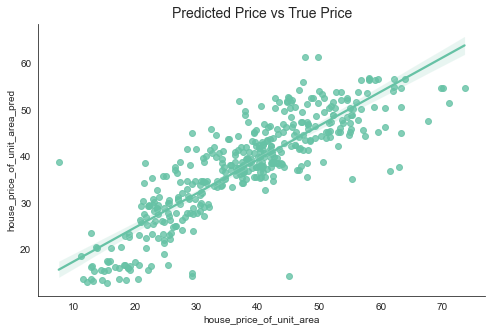

In [22]:
plt.figure(figsize=(8,5))

sns.regplot(x="house_price_of_unit_area",y="house_price_of_unit_area_pred",data=df)
plt.title("Predicted Price vs True Price", fontsize=14)
sns.despine()

## True Price vs Prediction Error

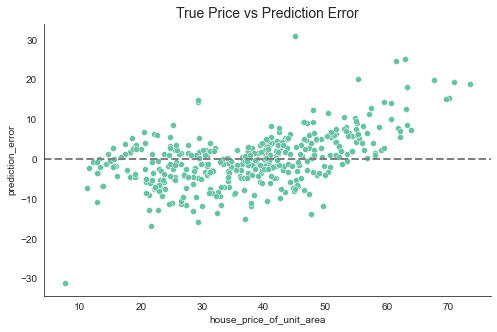

In [23]:
plt.figure(figsize=(8,5))

sns.scatterplot(x="house_price_of_unit_area",y="prediction_error",data=df)
plt.axhline(y=0,c="gray",linewidth=2,linestyle='--')
plt.title("True Price vs Prediction Error", fontsize=14)
sns.despine()

# Conclusion

+ Based on the best regression model above:
    - 1 year increase in house_age, would make price decrease 0.8845 unit, at the same time, 1 unit increase in squared house_age would also make price increase 0.0157 unit.
    - as the distance_to_MRT_station is log-transformed, 1 percentage increase in distance_to_MRT_station, would make price decrease 5.4906 unit.
    - latitude is a positive factor, 1 unit increase would make price increase 292.947 unit, house price is geo related very much.
    - number_of_convenience_stores is a positive factor, 0.5159 unit price increase with 1 more convenience_stores.
    - the year transaction happens is also significant, recent years the house price is hiher.
    
+ there are too many factors which would affect house price, we only included 5 relavent factors, and the model $R^{2}=0.728$, which is acceptable, but not quite good, if we want to make a more accurate house predict model, we may add more features into this regression model in future research.